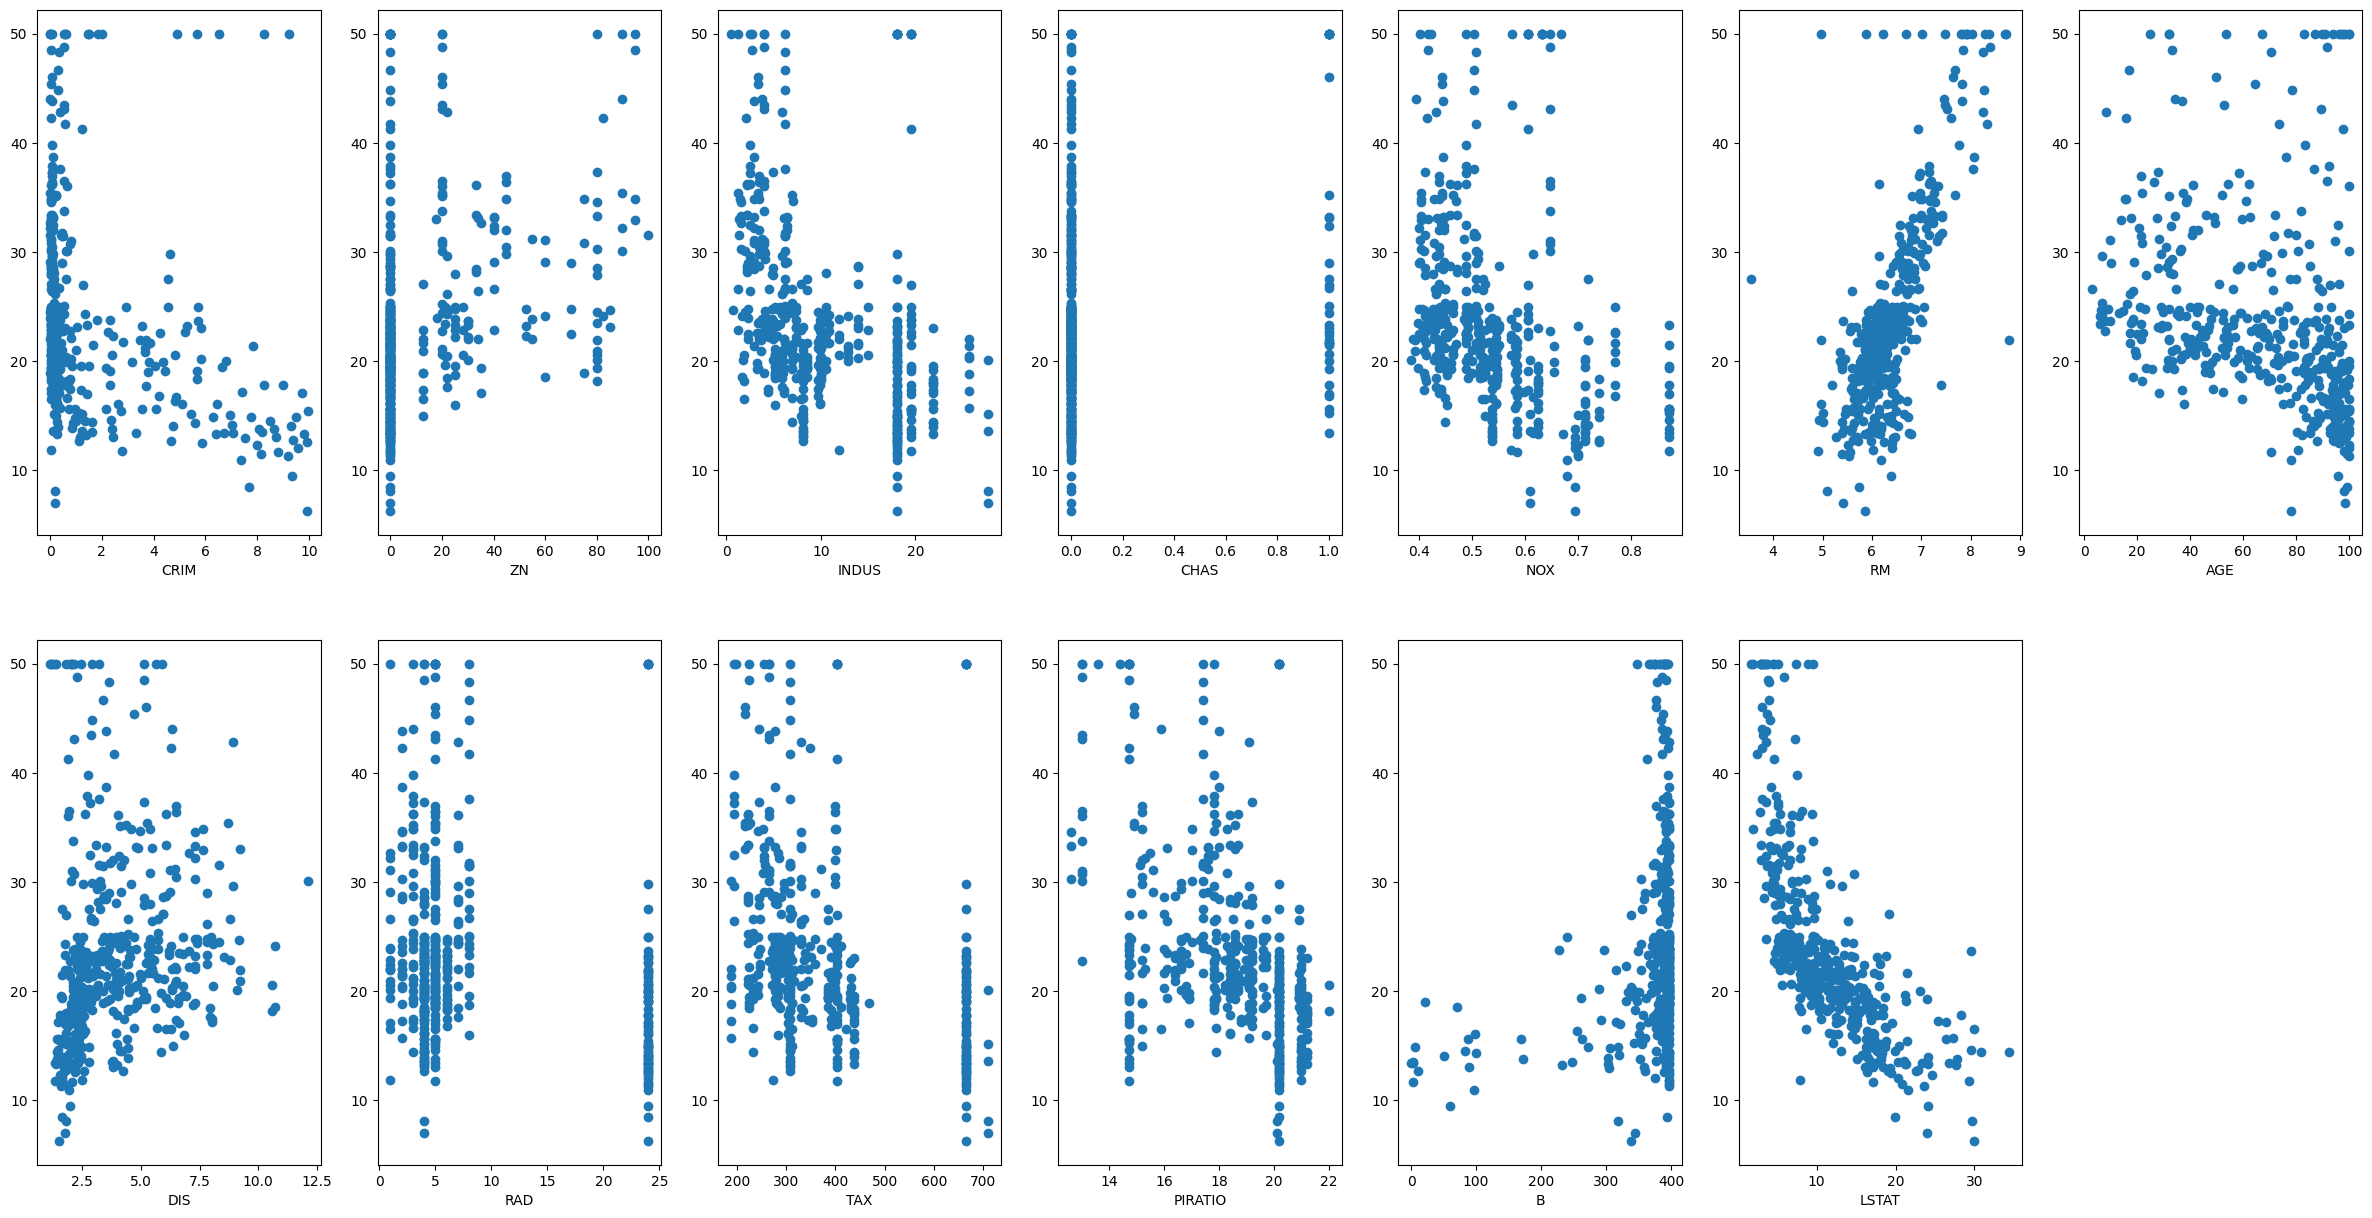

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
##读取数据
df1=pd.read_csv("boston_housing_data.csv")
##处理数据
df=df1.dropna()
##对数据进行可视化和简单的分析
t=1
Y=df['MEDV']
fig = plt.figure(figsize=(30,15))
for x in df.columns.tolist()[0:13]:
    plt.subplot(2,7,t)
    plt.xlabel(x)
    plt.scatter(df[x],Y)
    t += 1
plt.show()

观察这个散点图，我们可以发现这个城镇人均犯罪率一般普遍是小于1的，大部分集中在快靠近0的这一部分，只有非常小的一部分是过于大的，那么也就是说这个数据离群了。接下来用盒箱法来观察第一特征

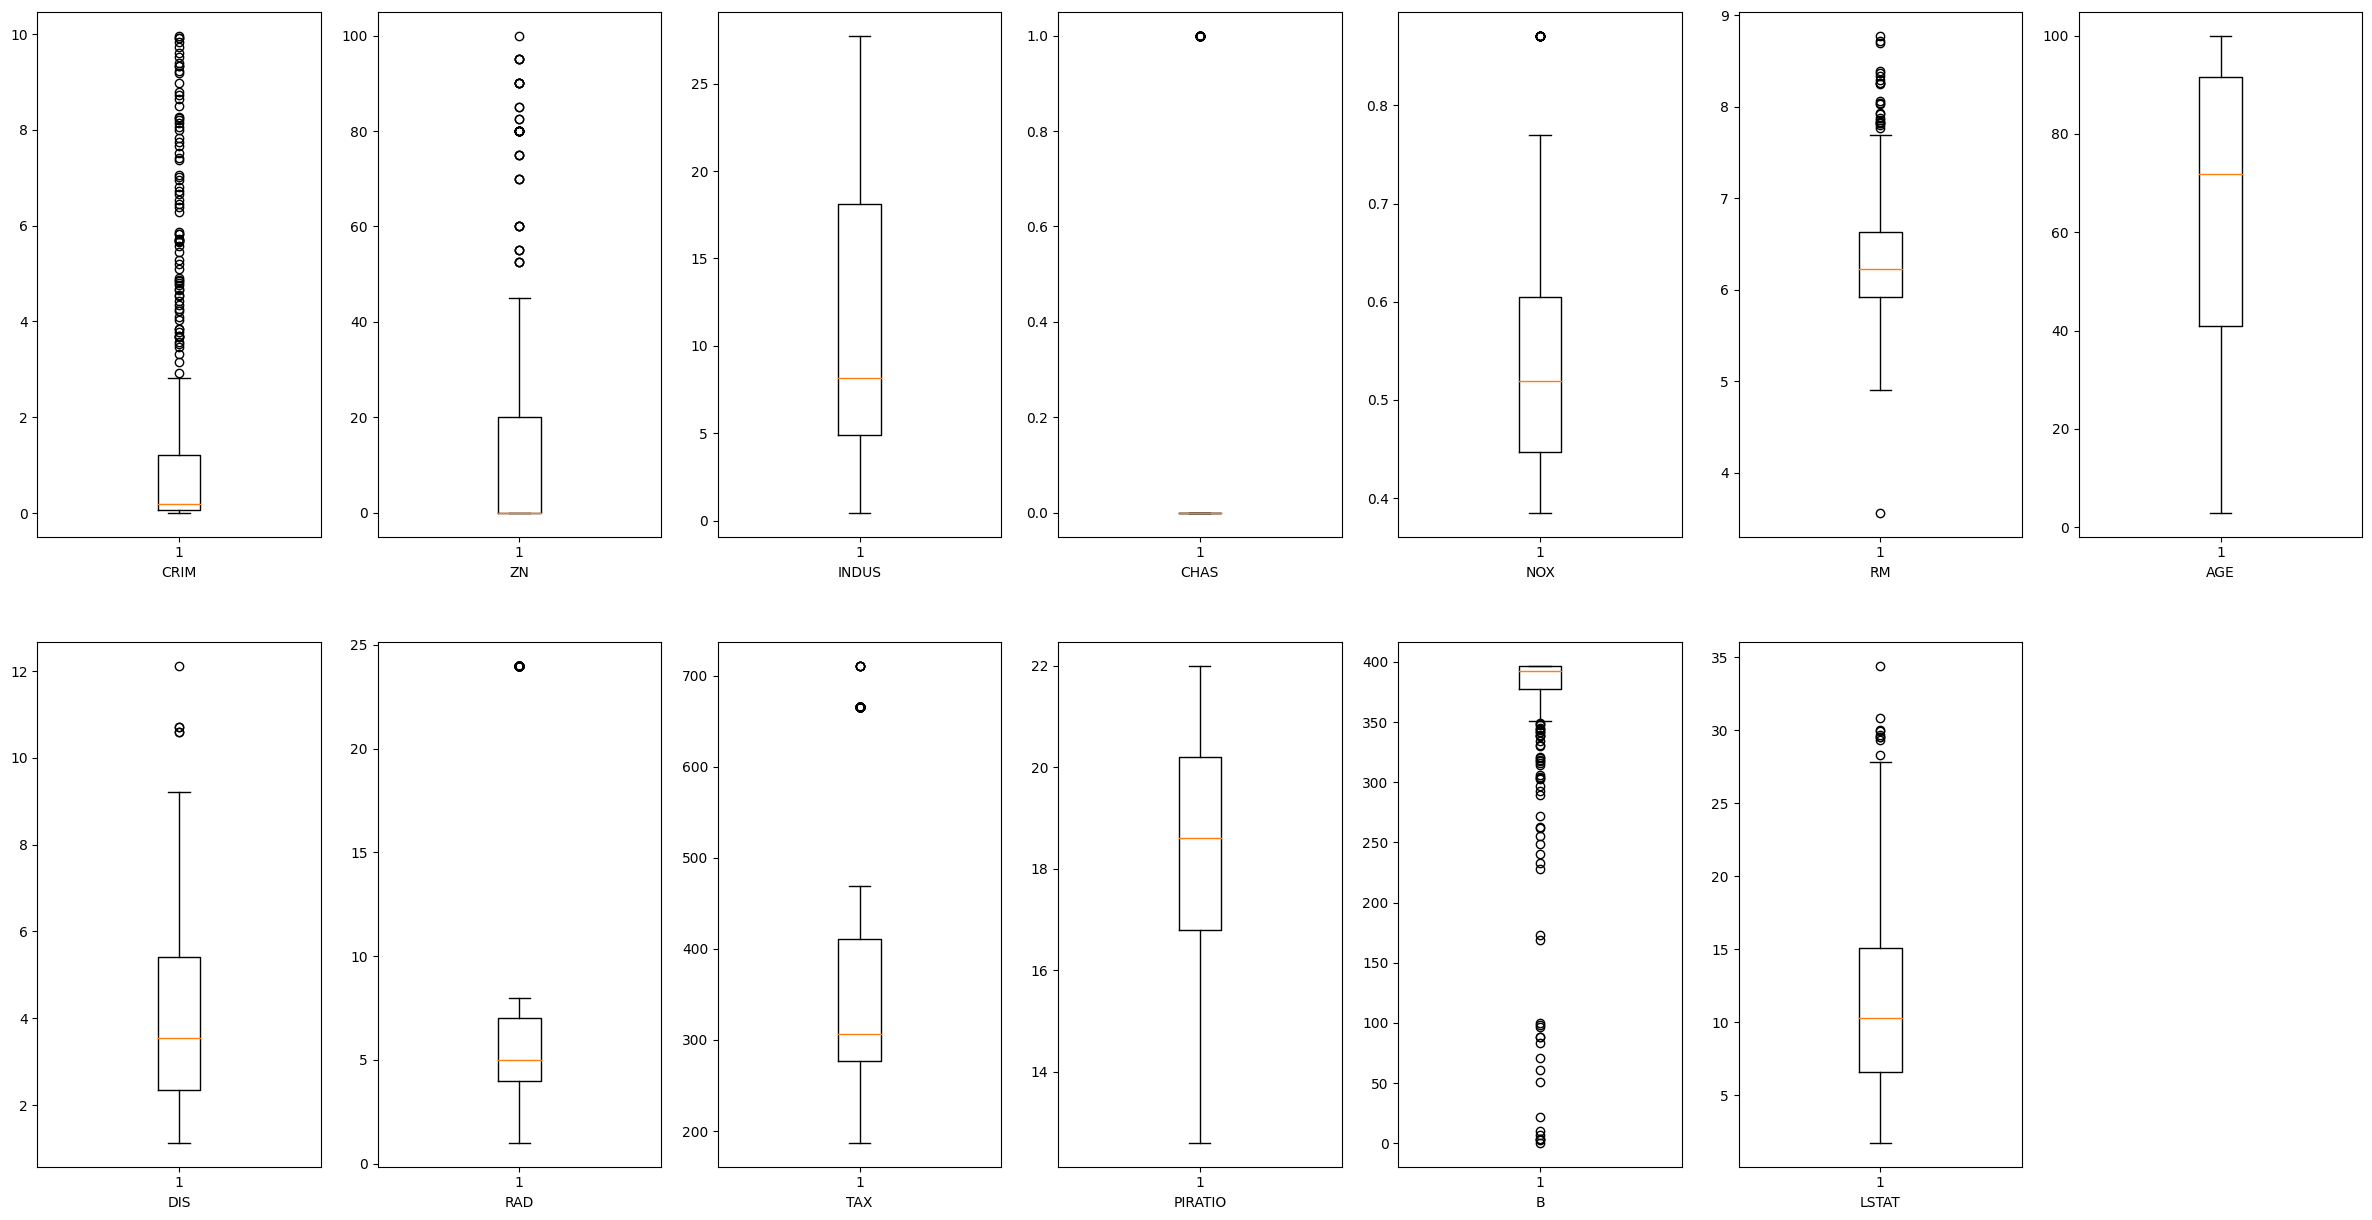

In [30]:
t=1
fig = plt.figure(figsize=(30,15))
for x in df.columns.tolist()[0:13]:
    plt.subplot(2,7,t)
    plt.xlabel(x)
    plt.boxplot(df[x])
    t += 1
plt.show()

我们可以看出这第一特征集合的位置，是在非常接近0的那一条红线，那么也就是过于离谱的值是不正常的（超过白线的那些数据是离群的）同理也可以得到其他数据的离群值,然后这一步有什么用呢，目测法，来判断出离群值的分界点，然后再剔除掉离群值即可。不过我感觉其实可以不去除的，保留一些变数，不过我还是把去除离群值的代码写在下面

In [ ]:
## 剔除离群值
def box_delete(data):
    Q1, median, Q2 = np.percentile(data, (25, 50, 75), interpolation='midpoint')
    Q3 = Q2 - Q1
    inner = [Q1-1.5*Q3, Q2+1.5*Q3]
    outer = [Q1-3.0*Q3, Q2+3.0*Q3]
    Data=[]
    for x in data:
        if x<=outer and x>=inner:
            Data.append(x)
    return Data
